In [ ]:
!pip install -q opendatasets


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import networkx as nx
import random
import opendatasets as od
import pandas as pd
from collections import Counter, OrderedDict
import seaborn as sns
from matplotlib.lines import Line2D
from itertools import combinations
import folium
import matplotlib.pyplot as plt
import numpy as np


{"username":"voltjunkie",\
"key":"f90087529bddf5cde2b204fcf88cb74e"}


# Используемые функции для задания

In [ ]:
def find_num_of_n(our_pos):
    G = nx.Graph()
    for i in range(len(moscow_estate_low)):
        G.add_node(i,
                    pos = (moscow_estate_low['geo_lat'][i], moscow_estate_low['geo_lon'][i]),
                    price = moscow_estate_low['price'][i])

    G.add_node(-1, pos=our_pos, price = None)

    nodes_to_delete = []
    G.nodes[-1]['degree'] = 0
    for node in G.nodes(data=True):
        if node[0]==-1:
            continue
        if ((node[1]['pos'][0] - G.nodes[-1]['pos'][0])**2 + (node[1]['pos'][1] - G.nodes[-1]['pos'][1])**2)**(1/2) < 0.02:
            #edges.append(node[0], -1))
            G.add_edge(node[0], -1)
            G.add_edge(-1, node[0])
            G.nodes[node[0]]['degree'] = 1
            G.nodes[-1]['degree'] += 1
        else:
            nodes_to_delete.append(node[0])
    G.remove_nodes_from(nodes_to_delete)

    return G, len(G.nodes())

# Выполнение задания

## 1. Выбрать (скачать) самостоятельно датасет (например, с kaggle.com) и построить граф с географической привязкой данных

In [ ]:
od.download("https://www.kaggle.com/datasets/mrdaniilak/russia-real-estate-2021")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: voltjunkie
Your Kaggle Key: ··········


100%|███████████████████████████████████████████████████████████████████████████████| 276M/276M [00:25<00:00, 11.2MB/s]


In [ ]:
russia_estate = pd.read_csv("russia-real-estate-2021/input_data.csv", sep=";")
russia_estate.head()

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,street_id,id_region,house_id
0,2021-01-01,2451300,15,31,1,30.3,0.0,56.780112,60.699355,0,2,620000.0,NaN,66,1632918.0
1,2021-01-01,1450000,5,5,1,33.0,6.0,44.608154,40.138381,0,0,385000.0,NaN,1,NaN
2,2021-01-01,10700000,4,13,3,85.0,12.0,55.540060,37.725112,3,0,142701.0,242543.0,50,681306.0
3,2021-01-01,3100000,3,5,3,82.0,9.0,44.608154,40.138381,0,0,385000.0,NaN,1,NaN
4,2021-01-01,2500000,2,3,1,30.0,9.0,44.738685,37.713668,3,2,353960.0,439378.0,23,1730985.0


In [ ]:
df = russia_estate.drop(["date", "level", "levels", "rooms", "kitchen_area", "street_id", "house_id", "building_type", "postal_code", "object_type", "object_type", "area"], axis=1, inplace=False) #убираем ненужные столбы
df.head()

,price,geo_lat,geo_lon,id_region
0,2451300,56.780112,60.699355,66
1,1450000,44.608154,40.138381,1
2,10700000,55.540060,37.725112,50
3,3100000,44.608154,40.138381,1
4,2500000,44.738685,37.713668,23


In [ ]:
moscow_estate = (df.loc[(df["id_region"] == 77)]).dropna().reset_index() # берем все данные по мск
moscow_estate.head()

,index,price,geo_lat,geo_lon,id_region
0,10,3350000,55.778026,37.540147,77
1,36,30000000,55.702794,37.666153,77
2,38,22112640,55.834958,37.637378,77
3,140,7400000,55.766357,37.712868,77
4,150,3000000,55.740164,37.546994,77


In [ ]:
moscow_estate_low = moscow_estate.loc[(moscow_estate["price"] < 15000000)].reset_index() # все с ценой меньше, чем 15м.
moscow_estate_low.head()

,level_0,index,price,geo_lat,geo_lon,id_region
0,0,10,3350000,55.778026,37.540147,77
1,3,140,7400000,55.766357,37.712868,77
2,4,150,3000000,55.740164,37.546994,77
3,8,165,10503090,55.805465,37.714470,77
4,11,206,6418000,55.805465,37.714470,77


## 2. Для решения задания использовать методы библиотеки networkx (источник: networkx.org)

In [ ]:
out_pos = (55.643499, 37.510000)

In [ ]:
G = nx.Graph()
for i in range(len(moscow_estate_low)):
  G.add_node(i,
             pos = (moscow_estate_low['geo_lat'][i], moscow_estate_low['geo_lon'][i]),
             price = moscow_estate_low['price'][i])

In [ ]:
G.add_node(-1, pos=our_pos, price = None)

In [ ]:
nodes_to_delete = []
G.nodes[-1]['degree'] = 0
for node in G.nodes(data=True):
    if node[0]==-1:
        continue
    if ((node[1]['pos'][0] - G.nodes[-1]['pos'][0])**2 + (node[1]['pos'][1] - G.nodes[-1]['pos'][1])**2)**(1/2) < 0.02:
        #edges.append(node[0], -1))
        G.add_edge(node[0], -1)
        G.add_edge(-1, node[0])
        G.nodes[node[0]]['degree'] = 1
        G.nodes[-1]['degree'] += 1
    else:
        nodes_to_delete.append(node[0])
G.remove_nodes_from(nodes_to_delete)

In [ ]:
moscow_map = folium.Map(location=[55.643499, 37.510000], zoom_start=12)

for node, data in G.nodes(data=True):
  folium.CircleMarker(
    popup=data['price'],
    location=data['pos']
  ).add_to(moscow_map)

for edge in G.edges(data=True):
  points = [nx.get_node_attributes(G, 'pos')[n] for n in edge[:2]]
  folium.PolyLine(points, weight=0.5, opacity=0.2).add_to(moscow_map)
moscow_map.save('russia-real-estate-2021/moscow_map_2.html')

## 3. Рассчитать среднюю степень вершины, средний минимальный путь и диаметр полученного графа

In [ ]:
print(f"Количество узлов в графе: {len(G.nodes)}\nКоличество связей в графе: {len(G.edges)*2}\nСредняя степень узла: {sum(nx.get_node_attributes(G, 'degree').values())/len(G.nodes)}")

Количество узлов в графе: 2823
Количество связей в графе: 5644
Средняя степень узла: 1.9992915338292596


In [ ]:
def count_degrees(G):
    arr = {}
    for degree in nx.get_node_attributes(G, 'degree').values():
        if arr.get(degree):
            arr[degree] +=1
        else:
            arr[degree] = 1
    arr = list(arr.items())
    return sorted(arr, key=lambda x: x[0])

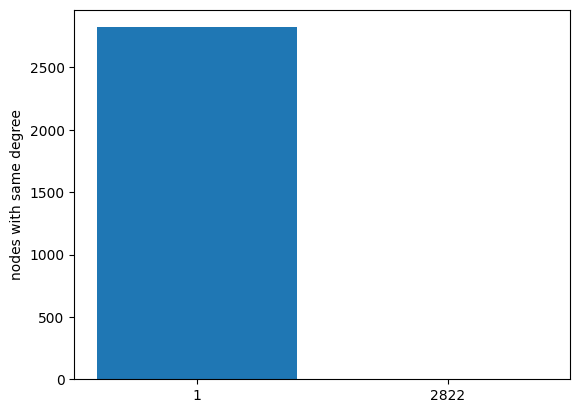

In [ ]:
degrees = count_degrees(G)

degree = [x[0] for x in degrees]
count = [x[1] for x in degrees]
x_pos = np.arange(len(degree))

plt.bar(x_pos, count,align='center')
plt.xticks(x_pos, degree)
plt.ylabel('nodes with same degree')
plt.show()

In [ ]:
print(f"Средний кратчайший путь для всего графа: {nx.average_shortest_path_length(G)}")

Средний кратчайший путь для всего графа: 1.9992915338292596


In [ ]:
print(f"Диаметр графа: {nx.diameter(G)}")

Диаметр графа: 2


## 4. Проанализировать и выявить закономерности при их наличии (например, специфика регионов и т.п.)

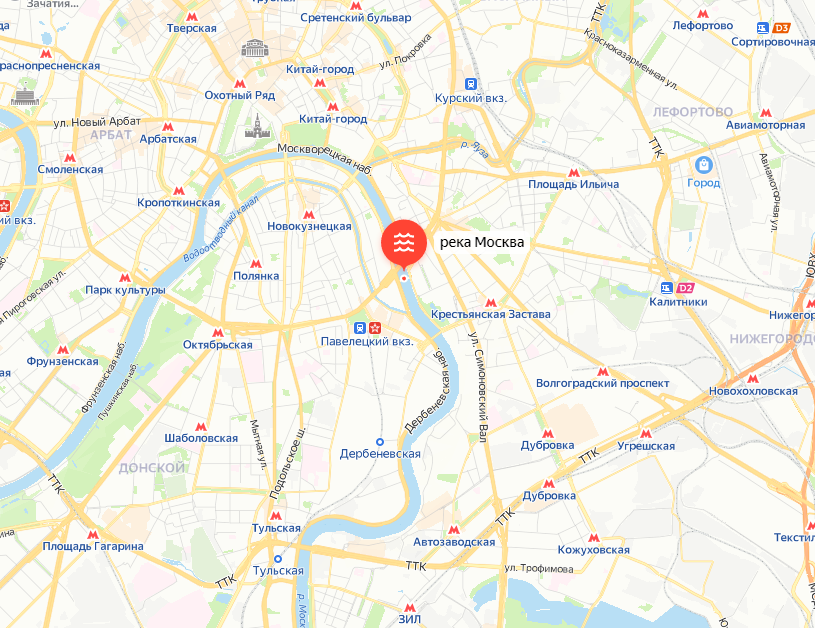

In [ ]:
find_num_of_n((55.735238, 37.647782))[1]

2025

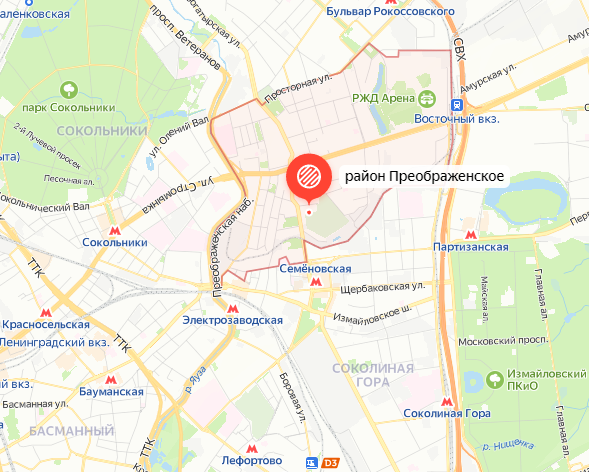

In [ ]:
find_num_of_n((55.790937, 37.717980))[1]

4149

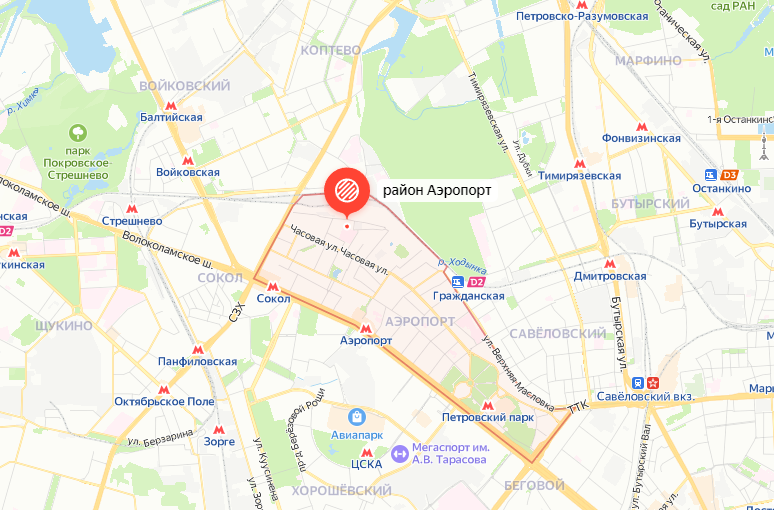

In [ ]:
find_num_of_n((55.811707, 37.529272))[1]

2526